In [48]:
# ПУНКТ № 1 ИМПОРТ БИБЛИОТЕК
import numpy as np
import pandas as pd
from google.colab import drive
import json
import zipfile
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from math import pi
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             mean_squared_error, r2_score)
import joblib
from math import pi

In [23]:
# ФИО: ГРЕЧАНИК КИРИЛЛ

# ТЕМА ПРОЕКТА: ПРИМЕНЕНИЕ МЕТОДОВ МАШИННОГО ОБУЧЕНИЯ ДЛЯ ОЦЕНКИ ВЕРОЯТНОСТИ РАЗВИТИЯ ИНСУЛЬТА.

# КРАТКОЕ ОПИСАНИЕ НАБОРА ДАННЫХ: НАБОР ДАННЫХ О ПАЦИЕНТАХ МЕДИЦИНСКИХ УЧРЕЖДЕНИЙ ВКЛЮЧАЮЩИЙ В СЕБЯ ПОКАЗАТЕЛИ ЗДОРОВЬЯ,
# УРОВЕНЬ ОРГАНИЧЕСКИХ СОЕДИНЕНИЙ, СМЕЖНЫХ ФАКТОРОВ ЖИЗНЕДЕЯТЕЛЬНОСТИ СКАЗЫВАЮЩИХСЯ НА РИСКЕ РАЗВИТИЯ ИНСУЛЬТА.

# ПУНКТ № 2 ПРОВЕДЕНИЕ РАЗВЕДОЧНОГО АНАЛИЗА ДАННЫХ (EDA)

# Расчет статистик (медиана, дисперсия, квантили, прочее)
# Построение полезных графиков
# Выводы

import numpy as np
import pandas as pd
from google.colab import drive
import json
import zipfile
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
display(df)
# Получим информацию о типах данных, размере, вложенности, количестве записей и полей датасета
inf1 = df.shape
inf2 = df.describe()
inf3 = df.info()
# Получим последние пять строк и первые пять строк
head_entires =  df.head(5)
tail_entires = df.tail(5)
display(head_entires, tail_entires)

# Подсчет занимаемой памяти в байтах
memory_in_bytes = df.memory_usage(deep=True).sum()  # deep=True для точного подсчета использования памяти для объектов типа строк

# Перевод в мегабайты
memory_in_mb = memory_in_bytes / (1024**2)

print(f'Размер DataFrame: {memory_in_mb:.2f} МБ')

# Определение количества категориальных признаков
categorical_count = df.select_dtypes(include=['object', 'category']).shape[1]

# Определение количества числовых признаков
numerical_count = df.select_dtypes(include=['number']).shape[1]

# Вывод результатов
print(f'Количество категориальных признаков: {categorical_count}')
print(f'Количество числовых признаков: {numerical_count}')
print(f'Количество числовых признаков: {df.describe()}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


Размер DataFrame: 1.62 МБ
Количество категориальных признаков: 5
Количество числовых признаков: 7
Количество числовых признаков:                  id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.24

In [24]:
# ПУНКТ № 2 РАЗВЕДОЧНЫЙ АНАЛИЗ
# ОПРЕДЕЛЕНИЯ  ДЛЯ КАЖДОЙ КАТЕГОРИАЛЬНОЙ ПЕРЕМЕННОЙ
import numpy as np
import pandas as pd


# Функция для проверки выбросов (используем метод IQR)
def check_outliers(series):
    if series.dtype != 'number':
        return None  # Выбросы не применимы к категориальным переменным
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()  # количество выбросов

# Анализ категориальных переменных
categorical_columns = df.select_dtypes(include=['object']).columns

results = {}

for col in categorical_columns:
    missing_fraction = df[col].isnull().mean()  # Доля пропусков
    unique_values = df[col].nunique()  # Количество уникальных значений
    outliers_count = check_outliers(df['age'])  # Проверка выбросов для числовой переменной age

    results[col] = {
        'Доля пропусков': missing_fraction,
        'Количество уникальных значений': unique_values,
        'Есть выбросы (в age)': bool(outliers_count)  # Проверка на наличие выбросов в age
    }

# Вывод результатов
results_df = pd.DataFrame(results).T
print(results_df)

               Доля пропусков Количество уникальных значений  \
gender                    0.0                              3   
ever_married              0.0                              2   
work_type                 0.0                              5   
Residence_type            0.0                              2   
smoking_status            0.0                              4   

               Есть выбросы (в age)  
gender                        False  
ever_married                  False  
work_type                     False  
Residence_type                False  
smoking_status                False  


In [25]:
# ПУНКТ № 2 РАЗВЕДОЧНЫЙ АНАЛИЗ
# ОПРЕДЕЛЕНИЯ  ДЛЯ КАЖДОЙ ЧИСЛОВОЙ ПЕРЕМЕННОЙ
import numpy as np
import pandas as pd
# Функция для проверки выбросов (используем метод IQR)
def check_outliers(series):
    if series.dtype != 'number':
        return 0  # Если переменная не числовая, устанавливаем количество выбросов в 0

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ((series < lower_bound) | (series > upper_bound)).sum()  # количество выбросов

# Анализ числовых переменных
numerical_columns = df.select_dtypes(include=['number']).columns

results = {}

for col in numerical_columns:
    missing_fraction = df[col].isnull().mean()  # Доля пропусков
    max_value = df[col].max()  # Максимальное значение
    min_value = df[col].min()  # Минимальное значение
    mean_value = df[col].mean()  # Среднее значение
    median_value = df[col].median()  # Медиана
    variance = df[col].var()  # Дисперсия
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)  # Межквартильный размах
    outliers_count = check_outliers(df[col])  # Проверка на наличие выбросов

    results[col] = {
        'Доля пропусков': missing_fraction,
        'Максимальное значение': max_value,
        'Минимальное значение': min_value,
        'Среднее значение': mean_value,
        'Медиана': median_value,
        'Дисперсия': variance,
        'IQR': IQR,
        'Есть выбросы': outliers_count > 0  # True, если есть выбросы
    }

# Вывод результатов
results_df = pd.DataFrame(results).T
print(results_df)


                  Доля пропусков Максимальное значение Минимальное значение  \
id                           0.0                 72940                   67   
age                          0.0                  82.0                 0.08   
hypertension                 0.0                     1                    0   
heart_disease                0.0                     1                    0   
avg_glucose_level            0.0                271.74                55.12   
bmi                     0.039335                  97.6                 10.3   
stroke                       0.0                     1                    0   

                  Среднее значение  Медиана         Дисперсия       IQR  \
id                    36517.829354  36932.0  447818462.126676  36940.75   
age                      43.226614     45.0        511.331792      36.0   
hypertension              0.097456      0.0          0.087976       0.0   
heart_disease             0.054012      0.0          0.051104      

/tmp/ipython-input-1279544273.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)
/tmp/ipython-input-1279544273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='stroke', data=stroke_count, palette='pastel')


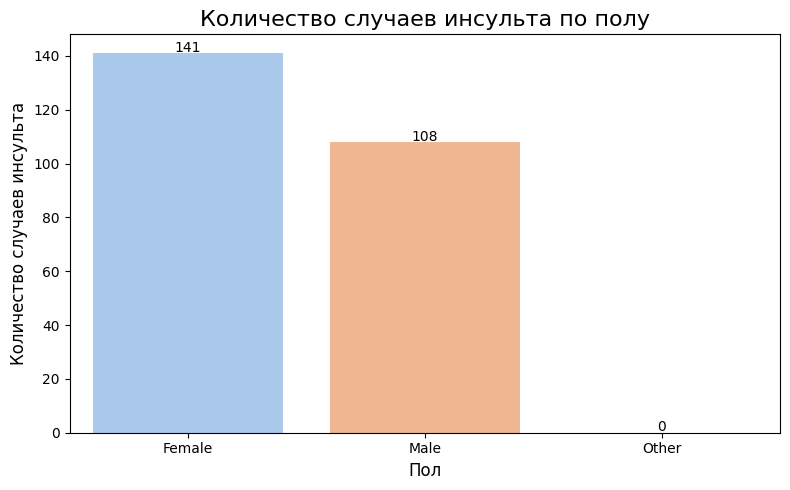

Общее количество инсультов: 249
Количество инсультов у мужчин: 108 (43.37%)
Количество инсультов у женщин: 141 (56.63%)
Женщины имеют больше случаев инсульта по сравнению с мужчинами.


In [26]:
# ПУНКТ № 2 ПОСТРОЕНИЕ ГРАФИКА ЗАВИСИМОСТИ КОЛИЧЕСТВА ИНСУЛЬТОВ ОТ ПОЛА

# Заполнение NULL значений в поле bmi средним значением
df['bmi'].fillna(df['bmi'].median(), inplace=True)
# Подсчет общего количества инсультов по полу
stroke_count = df.groupby('gender')['stroke'].sum().reset_index()

# Настройка визуализации
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='stroke', data=stroke_count, palette='pastel')

# Заголовок и метки
plt.title('Количество случаев инсульта по полу', fontsize=16)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество случаев инсульта', fontsize=12)

# Добавление значений над столбцами
for index, row in stroke_count.iterrows():
    plt.text(row['gender'], row['stroke'] + 0.5, int(row['stroke']), color='black', ha="center")

# Отображение графика
plt.tight_layout()
plt.show()

# Выводы по графику
total_strokes = stroke_count['stroke'].sum()
male_strokes = stroke_count.loc[stroke_count['gender'] == 'Male', 'stroke'].values[0]
female_strokes = stroke_count.loc[stroke_count['gender'] == 'Female', 'stroke'].values[0]

print(f"Общее количество инсультов: {total_strokes}")
print(f"Количество инсультов у мужчин: {male_strokes} ({(male_strokes/total_strokes)*100:.2f}%)")
print(f"Количество инсультов у женщин: {female_strokes} ({(female_strokes/total_strokes)*100:.2f}%)")

if male_strokes > female_strokes:
    print("Мужчины имеют больше случаев инсульта по сравнению с женщинами.")
elif female_strokes > male_strokes:
    print("Женщины имеют больше случаев инсульта по сравнению с мужчинами.")
else:
    print("Количество случаев инсульта у мужчин и женщин одинаково.")

/tmp/ipython-input-323847273.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)
/tmp/ipython-input-323847273.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_count = df.groupby('age_group')['stroke'].sum().reset_index()
/tmp/ipython-input-323847273.py:15: FutureWarning: 

Pass

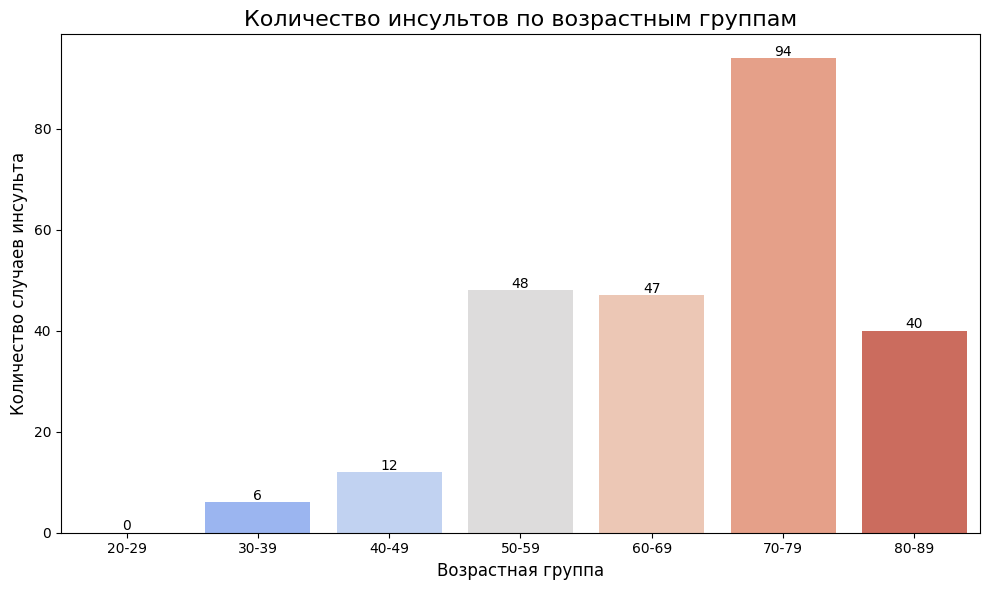

Общее количество случаев инсульта: 247
Возрастная группа 20-29: 0.00% случаев инсульта
Возрастная группа 30-39: 2.43% случаев инсульта
Возрастная группа 40-49: 4.86% случаев инсульта
Возрастная группа 50-59: 19.43% случаев инсульта
Возрастная группа 60-69: 19.03% случаев инсульта
Возрастная группа 70-79: 38.06% случаев инсульта
Возрастная группа 80-89: 16.19% случаев инсульта

Возрастная группа с наибольшим количеством инсультов: '70-79'


In [27]:
# ПУНКТ № 2 ПОСТРОЕНИЕ ГРАФИКА ЗАВИСИМОСТИ КОЛИЧЕСТВА ИНСУЛЬТОВ ОТ ВОЗРАСТНЫХ ГРУПП

# Заполнение NULL значений в поле bmi средним значением
df['bmi'].fillna(df['bmi'].median(), inplace=True)
# Создание возрастных групп
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Подсчет случаев инсульта по возрастным группам
stroke_count = df.groupby('age_group')['stroke'].sum().reset_index()

# Настройка визуализации
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='stroke', data=stroke_count, palette='coolwarm')

# Заголовок и метки
plt.title('Количество инсультов по возрастным группам', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество случаев инсульта', fontsize=12)

# Добавление значений над столбцами
for index, row in stroke_count.iterrows():
    plt.text(index, row['stroke'] + 0.5, int(row['stroke']), color='black', ha="center")

# Отображение графика
plt.tight_layout()
plt.show()

# Выводы по графику
total_strokes = stroke_count['stroke'].sum()
average_stroke_rates = stroke_count['stroke'] / total_strokes

print(f"Общее количество случаев инсульта: {total_strokes}")
for group, rate in zip(stroke_count['age_group'], average_stroke_rates):
    print(f"Возрастная группа {group}: {rate:.2%} случаев инсульта")

# Анализ
max_strokes_group = stroke_count.loc[stroke_count['stroke'].idxmax(), 'age_group']
print(f"\nВозрастная группа с наибольшим количеством инсультов: '{max_strokes_group}'")


In [28]:
# ПУНКТ № 4 ГИПОТЕЗА № 1 ПОЛ И ВЕРОЯТНОСТЬ ИНСУЛЬТА
# Гипотеза H0: Разницы в частоте инсультов между мужчинами и женщинами нет (пропорция инсультов одинаковая).
# Гипотеза H1: Разница в частоте инсультов между мужчинами и женщинами существует (пропорции инсультов различаются).
# Критерий для проверки: Для проверки гипотезы о разнице пропорций используем тест хи-квадрат (chi-squared test),
# так как у нас есть категориальные данные для двух групп (мужчины и женщины).
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from scipy.stats import chi2_contingency
# Заполнение NULL значений в поле bmi средним значением
df['bmi'].fillna(df['bmi'].median(), inplace=True)
# Создание таблицы сопряженности
contingency_table = pd.crosstab(df['gender'], df['stroke'])

# Применение теста хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Результаты теста хи-квадрат:")
print(f"chi2 statistic: {chi2}, p-value: {p}")

# Проверка гипотезы
alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу: Есть статистически значимая разница между мужчинами и женщинами по частоте инсультов.")
else:
    print("Не отвергаем нулевую гипотезу: Нет статистически значимой разницы между мужчинами и женщинами по частоте инсультов.")

Результаты теста хи-квадрат:
chi2 statistic: 0.47258662884530234, p-value: 0.7895490538408245
Не отвергаем нулевую гипотезу: Нет статистически значимой разницы между мужчинами и женщинами по частоте инсультов.


/tmp/ipython-input-296735010.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [29]:
# ПУНКТ № 4 ГИПОТЕЗА № 2 ВОЗРАСТ И ВЕРОЯТНОСТЬ ИНСУЛЬТА
# Гипотеза H0: Возраст не влияет на вероятность инсульта (средний возраст у больных и здоровых одинаковый).
# Гипотеза H1: Возраст влияет на вероятность инсульта (средний возраст у больных и здоровых различается).
# Критерий для проверки: Используем t-тест для независимых выборок,
# так как у нас есть две группы (с инсультами и без) и мы хотим сравнить средние значения одной количественной переменной (возраст).
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
# Заполнение NULL значений в поле bmi средним значением
df['bmi'].fillna(df['bmi'].median(), inplace=True)
alpha = 0.05
# Две выборки: возраст людей с инсультом и без инсульта
stroke_age = df[df['stroke'] == 1]['age']
no_stroke_age = df[df['stroke'] == 0]['age']

# Проведение t-теста
t_stat, p_value = ttest_ind(stroke_age, no_stroke_age, equal_var=False)  # Не предполагаем равенство дисперсий

print("Результаты t-теста:")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средний возраст людей с инсультом отличается от среднего возраста людей без инсульта.")
else:
    print("Не отвергаем нулевую гипотезу: Средний возраст людей с инсультом не отличается от среднего возраста людей без инсульта.")

    # Гипотезы и результаты могут помочь в выявлении популяционных рисков и разработке стратегий управления здоровьем.

Результаты t-теста:
t-statistic: 29.68626563006023, p-value: 2.115684848347272e-95
Отвергаем нулевую гипотезу: Средний возраст людей с инсультом отличается от среднего возраста людей без инсульта.


/tmp/ipython-input-1715338494.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [30]:
from math import pi
# ПУНКТ № 5 ПРЕДОБРАБОТКА ДАННЫХ И ПОСТРОЕНИЕ МОДЕЛЕЙ МАШИННОГО ОБУЧЕНИЯ


# Выводим описание датасета и основные мат метрики
df.describe()
# Выводим информацию о типах данных в датасете и проверяем на соответствие значениям фактическим
df.info()
# Удаляем поля не несущие смысла а также содержащие null и выбросы заодно убеждаемся в готовности данных к разделению на выборки и обучению
print("Dropping Unnecesarry Columns: \n")
df = df.drop(['id','bmi','age_group'], axis=1)


print("Checking Missing/Null Values: \n")
df.isnull().sum()
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level']
# Проверяем уникальные значения во всех полях
print("Uniquie Values in each Column: \n")
print('gender : ', df['gender'].unique())
print('ever_married : ', df['ever_married'].unique())
print('work_type : ', df['work_type'].unique())
print('Residence_type : ', df['Residence_type'].unique())
print('age : ', df['age'].unique())
print('hypertension : ', df['hypertension'].unique())
print('heart_disease : ', df['heart_disease'].unique())
print('avg_glucose_level : ', df['avg_glucose_level'].unique())
# Преобразуем категориальные переменные в числовые для машинного обучения
cols_yes_no_values = ['hypertension', 'heart_disease','stroke']

yes__no_values = {'0':0, '1':1}
for i in range(0, len(cols_yes_no_values)):
    df[cols_yes_no_values[i]] = df[cols_yes_no_values[i]].replace(yes__no_values)

# gender
gender = {'Female':0, 'Male':1, 'Other':2}
df['gender'] = df['gender'].replace(gender)

# age
age= {
    '0-1': 0, '1.1-2': 1, '2.1-3': 2, '3.1-4': 3, '4.1-5': 4, '5.1-6': 5, '6.1-7': 6,
    '7.1-8': 7, '8.1-9': 8, '9.1-10': 9, '10.1-11': 10, '11.1-12': 11, '12.1-13': 12,
    '13.1-14': 13, '14.1-15': 14, '15.1-16': 15, '16.1-17': 16, '17.1-18': 17,
    '18.1-19': 18, '19.1-20': 19, '20.1-21': 20, '21.1-22': 21, '22.1-23': 22,
    '23.1-24': 23, '24.1-25': 24, '25.1-26': 25, '26.1-27': 26, '27.1-28': 27,
    '28.1-29': 28, '29.1-30': 29, '30.1-31': 30, '31.1-32': 31, '32.1-33': 32,
    '33.1-34': 33, '34.1-35': 34, '35.1-36': 35, '36.1-37': 36, '37.1-38': 37,
    '38.1-39': 38, '39.1-40': 39, '40.1-41': 40, '41.1-42': 41, '42.1-43': 42,
    '43.1-44': 43, '44.1-45': 44, '45.1-46': 45, '46.1-47': 46, '47.1-48': 47,
    '48.1-49': 48, '49.1-50': 49, '50.1-51': 50, '51.1-52': 51, '52.1-53': 52,
    '53.1-54': 53, '54.1-55': 54, '55.1-56': 55, '56.1-57': 56, '57.1-58': 57,
    '58.1-59': 58, '59.1-60': 59, '60.1-61': 60, '61.1-62': 61, '62.1-63': 62,
    '63.1-64': 63, '64.1-65': 64, '65.1-66': 65, '66.1-67': 66, '67.1-68': 67,
    '68.1-69': 68, '69.1-70': 69, '70.1-71': 70, '71.1-72': 71, '72.1-73': 72,
    '73.1-74': 73, '74.1-75': 74, '75.1-76': 75, '76.1-77': 76, '77.1-78': 77,
    '78.1-79': 78, '79.1-80': 79, '80.1-81': 80, '81.1-82': 81
}
df['age'] = df['age'].replace(age)

# avg_glucose_level
avg_glucose_level= {'55-60':0, '60-65':1, '66-70':2, '71-75':3, '76-80':4, '81-85':5, '86-90':6, '91-95':7,
                    '96-100':8,'101-105':9, '106-110':10, '111-115':11, '116-120':12,'121-125':13,
                    '126-130':14, '131-135':15, '136-140':16,'141-145':17, '146-150':18, '151-155':19,
                    '156-160':20,'161-165':21, '166-170':22, '171-175':23, '176-180':24,'181-185':25,
                    '186-190':26, '191-195':27, '196-200':28,'201-205':29, '206-210':30, '211-115':31,
                    '216-220':32,'221-225':33, '226-230':34, '231-235':35, '236-240':36,'241-245':37,
                    '246-250':38, '251-255':39, '256-260':40, '261-265':41, '266-270':42,'271-275':43}
df['avg_glucose_level'] = df['avg_glucose_level'].replace(avg_glucose_level)

# ever_married
ever_married = {'Yes':0, 'No':1}
df['ever_married'] = df['ever_married'].replace(ever_married)

# work_type
work_type = {'children':0, 'Govt_job':1, 'Never_worked':2,'Private':3, 'Self-employed':4}
df['work_type'] = df['work_type'].replace(work_type)

# Residence_type
residence_type = {'Rural':0, 'Urban':1}
df['Residence_type'] = df['Residence_type'].replace(residence_type)

# smoking_status
smoking_status = {'formerly smoked':0, 'never smoked':1, 'smokes':2,'Unknown':3}
df['smoking_status'] = df['smoking_status'].replace(smoking_status)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  age_group          4144 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 484.5+ KB
Dropping Unnecesarry Columns: 

Checking Missing/Null Values: 

Uniquie Values in

/tmp/ipython-input-3095684795.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(gender)
/tmp/ipython-input-3095684795.py:72: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_married'] = df['ever_married'].replace(ever_married)
/tmp/ipython-input-3095684795.py:76: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [31]:
print(df['gender'].value_counts())

# 0    2994
# 1    2115
# 2       1
# В категории * Другое* в поле gender  содержится одна запись и по сути является выбросом, избавимся от нее так как она в дальнейшем не внесет полезного в модель
# Удаляем записи где gender == 2
df = df[df['gender'] != 2]

print(df['gender'].value_counts())

gender
0    2994
1    2115
2       1
Name: count, dtype: int64
gender
0    2994
1    2115
Name: count, dtype: int64


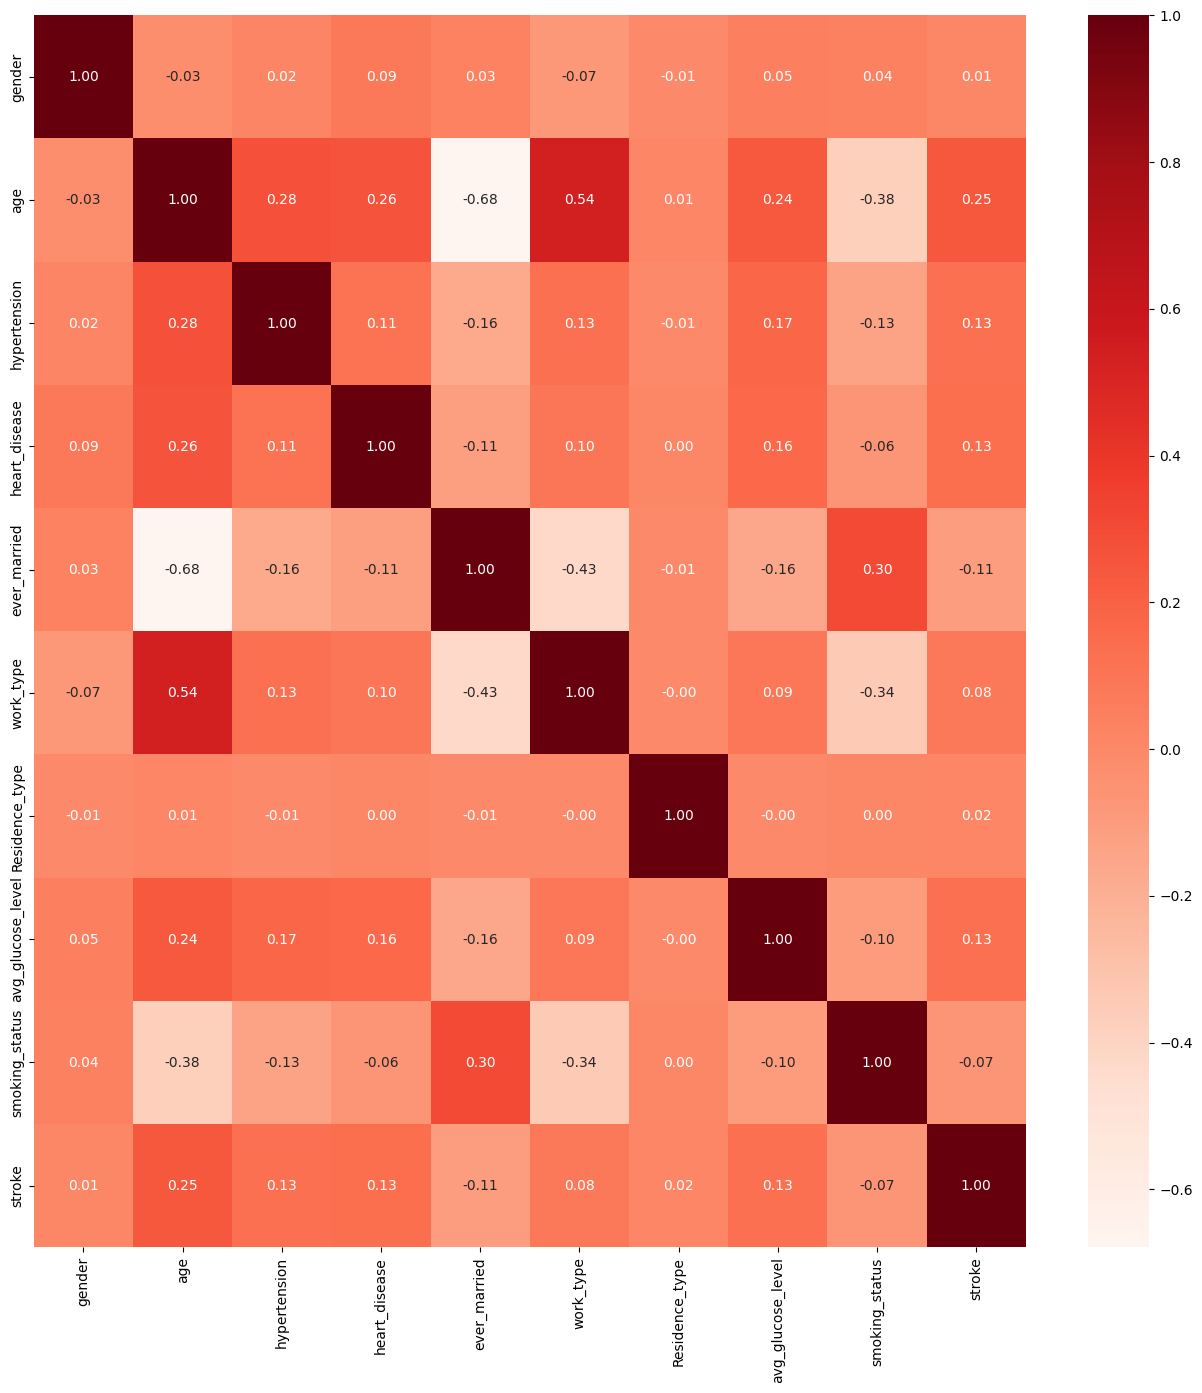

In [32]:
plt.figure(figsize=(16,16))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()
# Построим матрицу корреляции

In [33]:
# Подсчитаем количество записей по категориям в полях
print(df['gender'].value_counts(), "\n")
print(df['work_type'].value_counts(), "\n")
print(df['Residence_type'].value_counts(), "\n")
print(df['ever_married'].value_counts(), "\n")
print(df['smoking_status'].value_counts(), "\n")
print(df['hypertension'].value_counts(), "\n")
print(df['heart_disease'].value_counts(), "\n")
print(df['age'].value_counts(), "\n")
print(df['avg_glucose_level'].value_counts(), "\n")
print(df['stroke'].value_counts())

gender
0    2994
1    2115
Name: count, dtype: int64 

work_type
3    2924
4     819
0     687
1     657
2      22
Name: count, dtype: int64 

Residence_type
1    2596
0    2513
Name: count, dtype: int64 

ever_married
0    3353
1    1756
Name: count, dtype: int64 

smoking_status
1    1892
3    1544
0     884
2     789
Name: count, dtype: int64 

hypertension
0    4611
1     498
Name: count, dtype: int64 

heart_disease
0    4833
1     276
Name: count, dtype: int64 

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64 

avg_glucose_level
93.88     6
73.00     5
72.49     5
91.85     5
91.68     5
         ..
91.01     1
120.03    1
167.41    1
214.09    1
219.84    1
Name: count, Length: 3978, dtype: int64 

stroke
0    4860
1     249
Name: count, dtype: int64


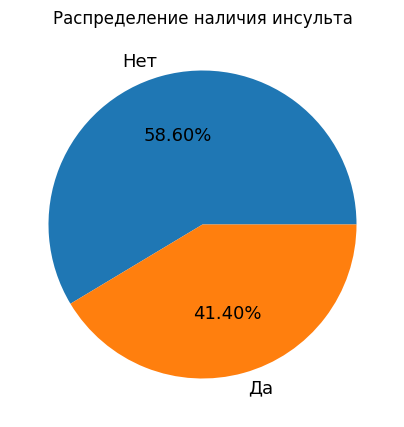

In [34]:
# Построим пай чарты для визуализации распределения бинарных переменных
plt.figure(figsize = (5,5))
temp = [2994,2115]
wt1 = [4860,249]
labels = ['Нет','Да']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Распределение наличия инсульта')
plt.show()

In [35]:
print("Число положительных случаев : 1925")
print("Число отрицательных случаев : 4861")
print("Процент положительных случаев из них :", (249/(249+4861))*100)

Число положительных случаев : 1925
Число отрицательных случаев : 4861
Процент положительных случаев из них : 4.87279843444227


Logistic Regression Метрики:
Accuracy: 0.74
Precision: 0.16
Recall: 0.92
F1 Score: 0.27
ROC AUC: 0.83


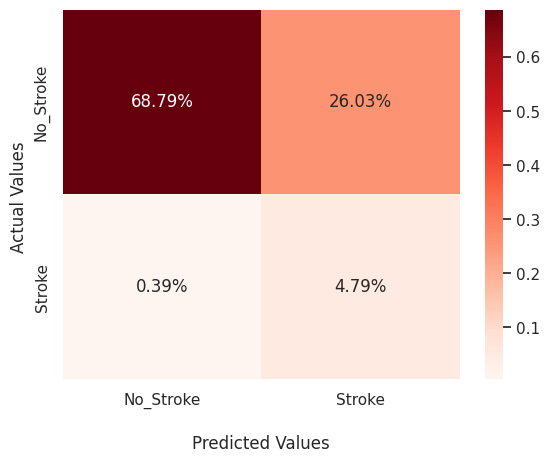

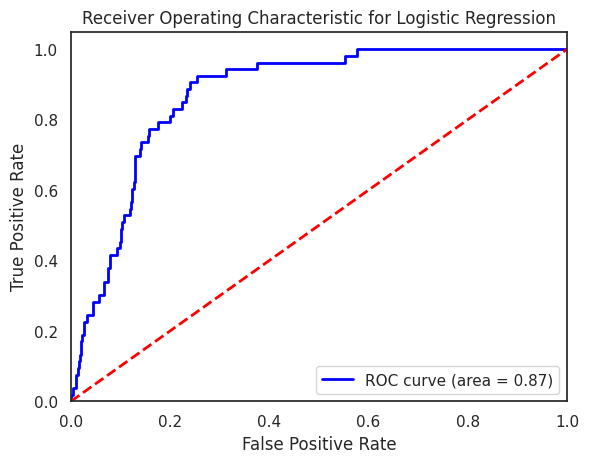

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Разбиваем данные на train и test
x = df.drop("stroke", axis=1)
y = df["stroke"]
# Целевая переменная таргет stroke (бинарная)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=105)

# Функция для построения матрицы
def plot_confusion_matrix(Y_test, y_pred, model_name):
    cm = confusion_matrix(Y_test, y_pred)
    ax = sns.heatmap(cm / np.sum(cm), fmt='.2%', annot=True, cmap='Reds')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    ax.yaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    plt.show()

# Выведем значения по каждой метрике качества
def print_metrics(Y_test, y_pred):
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')

# Функция для построения ROC-кривой
def plot_roc_curve(Y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

# ПОСТРОЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

print("Logistic Regression Метрики:")
print_metrics(Y_test, y_pred_lr)
plot_confusion_matrix(Y_test, y_pred_lr, "Logistic Regression")
plot_roc_curve(Y_test, y_pred_proba_lr, "Logistic Regression")

Decision Tree Метрики:
Accuracy: 0.92
Precision: 0.16
Recall: 0.13
F1 Score: 0.14
ROC AUC: 0.55


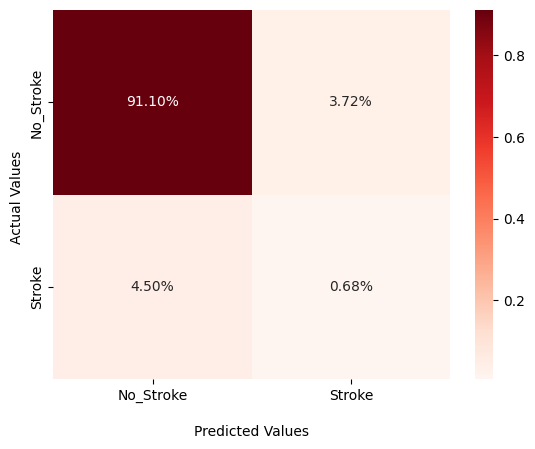

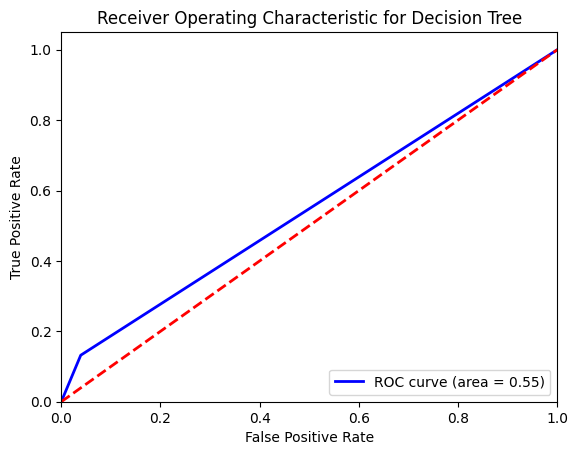

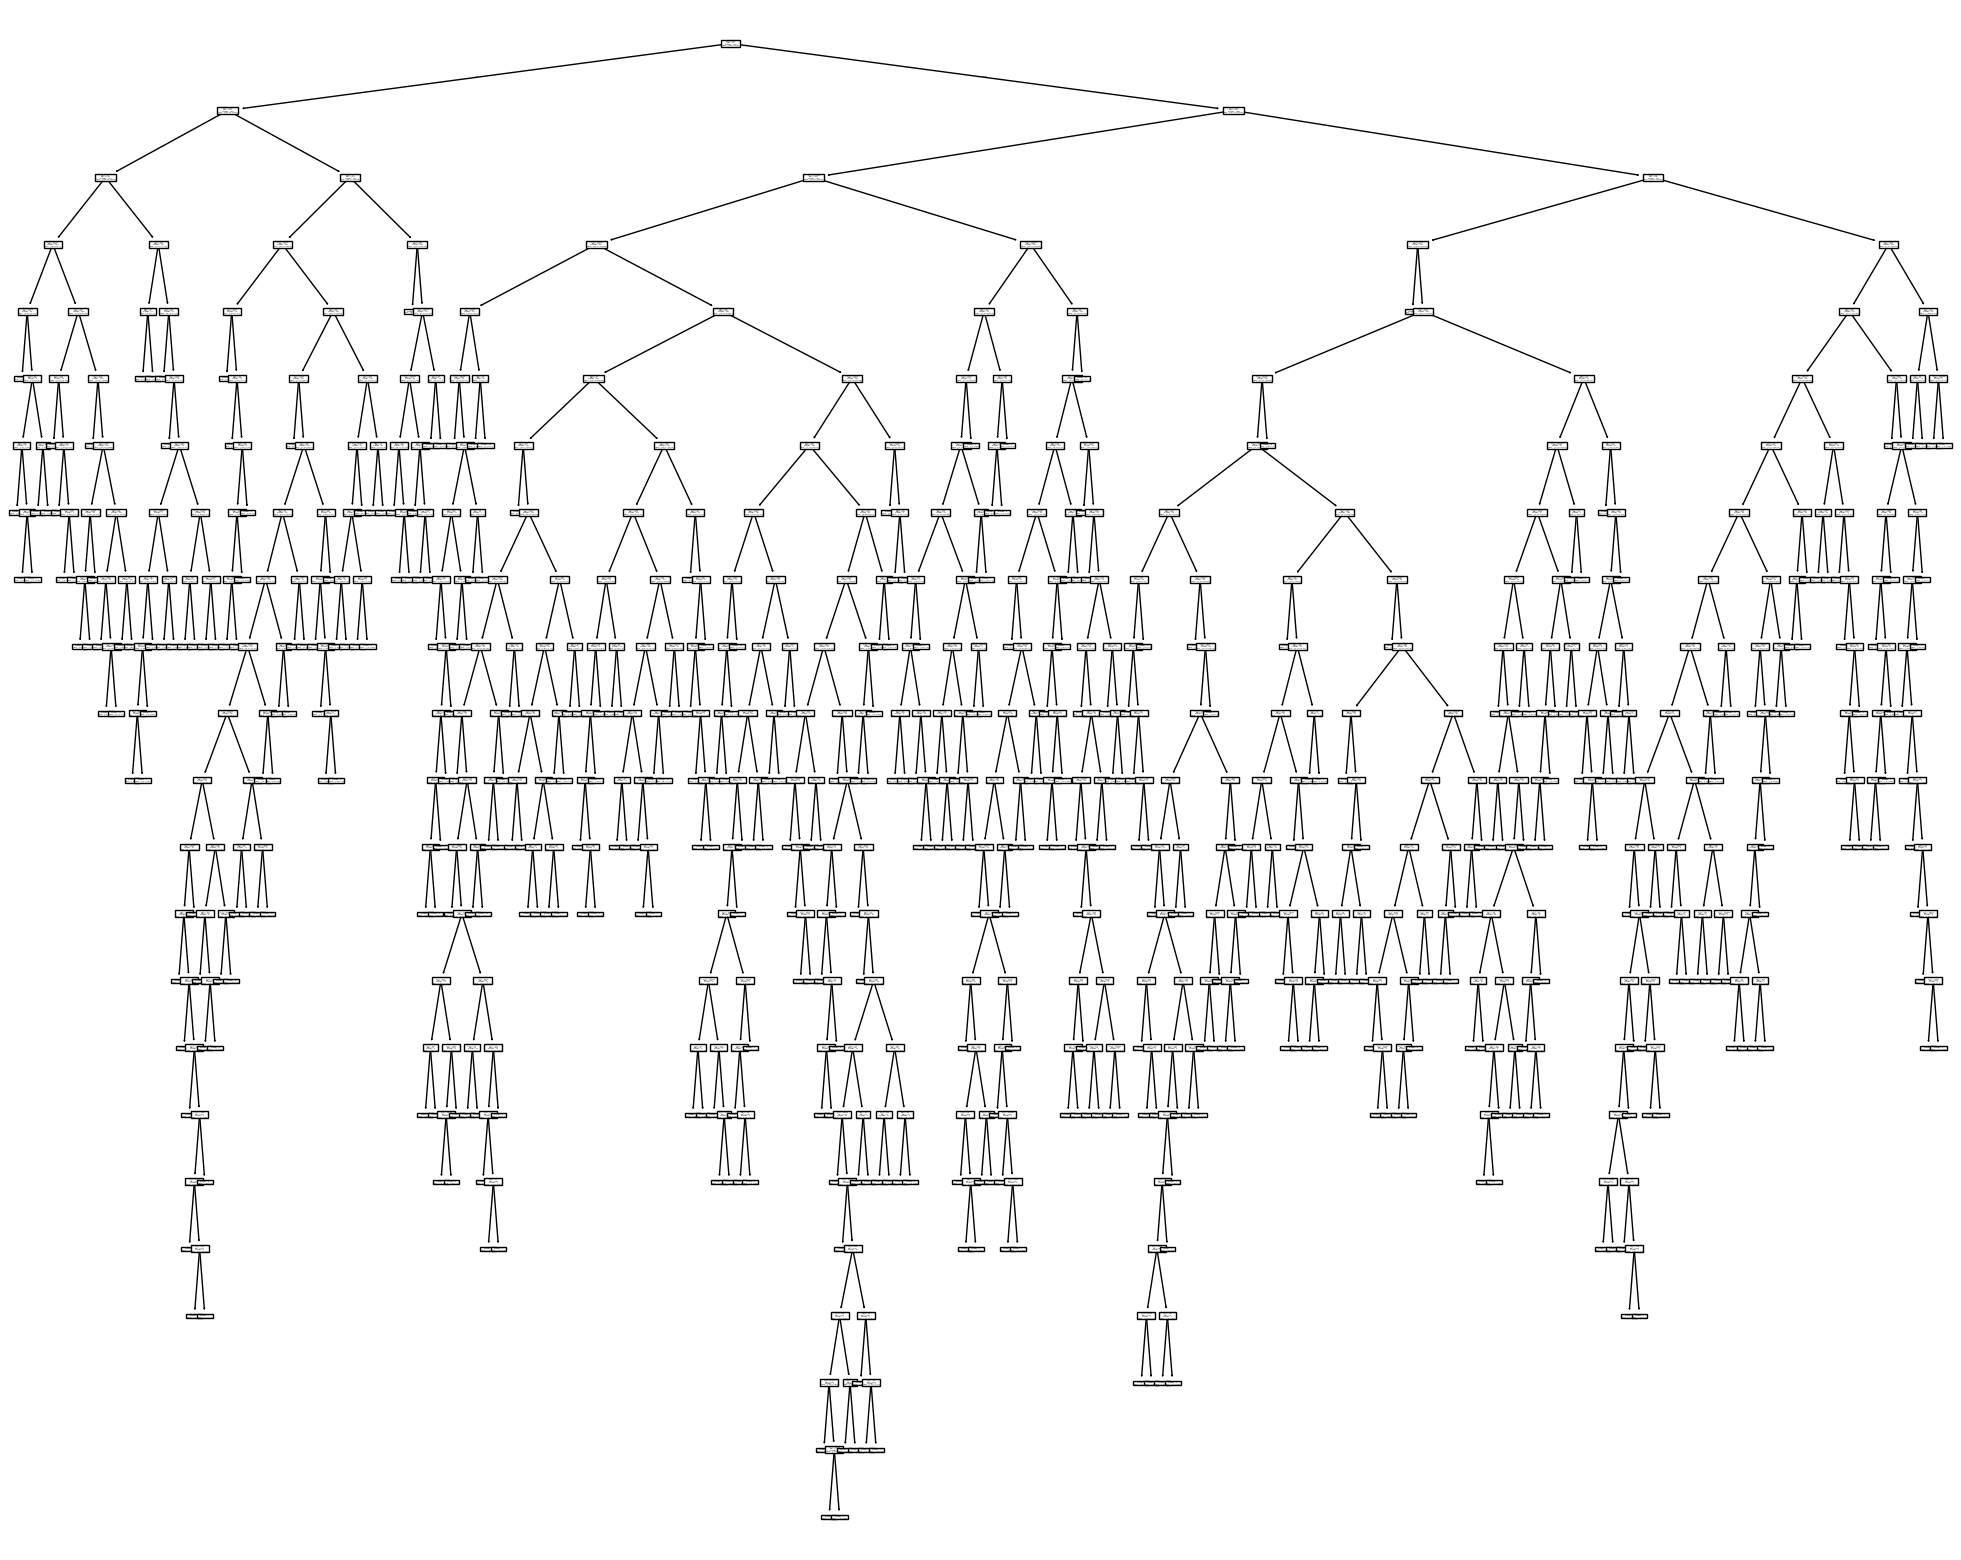

In [39]:
# ПОСТРОЕНИЕ ДЕРЕВА РЕШЕНИЙ
# Разбиваем данные на train и test
x = df.drop("stroke", axis=1)
y = df["stroke"]
# Целевая переменная таргет stroke (бинарная)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=105)

# Функция для построения матрицы
def plot_confusion_matrix(Y_test, y_pred, model_name):
    cm = confusion_matrix(Y_test, y_pred)
    ax = sns.heatmap(cm / np.sum(cm), fmt='.2%', annot=True, cmap='Reds')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    ax.yaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    plt.show()

# Выведем значения по каждой метрике качества
def print_metrics(Y_test, y_pred):
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')

# Функция для построения ROC-кривой
def plot_roc_curve(Y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

# Построение дерева решений
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

print("Decision Tree Метрики:")
print_metrics(Y_test, y_pred_dt)
plot_confusion_matrix(Y_test, y_pred_dt, "Decision Tree")
plot_roc_curve(Y_test, y_pred_proba_dt, "Decision Tree")

from sklearn import tree
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(dt)
plt.show()

Random Forest Метрики:
Accuracy: 0.95
Precision: 0.33
Recall: 0.02
F1 Score: 0.04
ROC AUC: 0.51


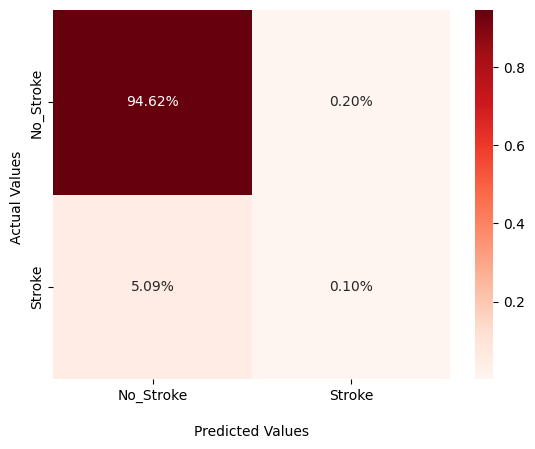

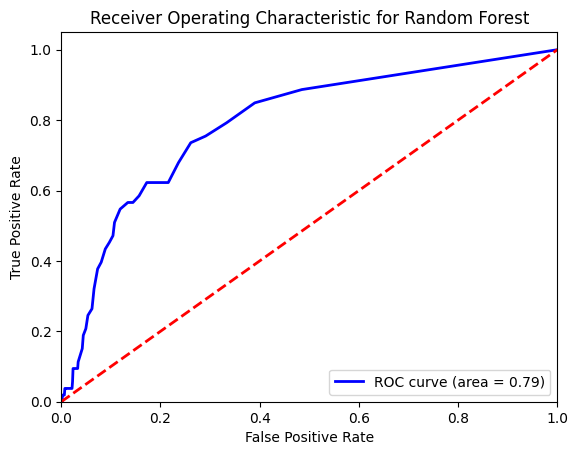

In [40]:
# СЛУЧАЙНЫЙ ЛЕС
# Разбиваем данные на train и test
x = df.drop("stroke", axis=1)
y = df["stroke"]
# Целевая переменная таргет stroke (бинарная)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=105)

# Функция для построения матрицы
def plot_confusion_matrix(Y_test, y_pred, model_name):
    cm = confusion_matrix(Y_test, y_pred)
    ax = sns.heatmap(cm / np.sum(cm), fmt='.2%', annot=True, cmap='Reds')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    ax.yaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    plt.show()

# Выведем значения по каждой метрике качества
def print_metrics(Y_test, y_pred):
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')

# Функция для построения ROC-кривой
def plot_roc_curve(Y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

# Метод Random forest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

print("Random Forest Метрики:")
print_metrics(Y_test, y_pred_rf)
plot_confusion_matrix(Y_test, y_pred_rf, "Random Forest")
plot_roc_curve(Y_test, y_pred_proba_rf, "Random Forest")

K-Nearest Neighbors Metrics:
Accuracy: 0.95
Precision: 0.29
Recall: 0.04
F1 Score: 0.07
ROC AUC: 0.52


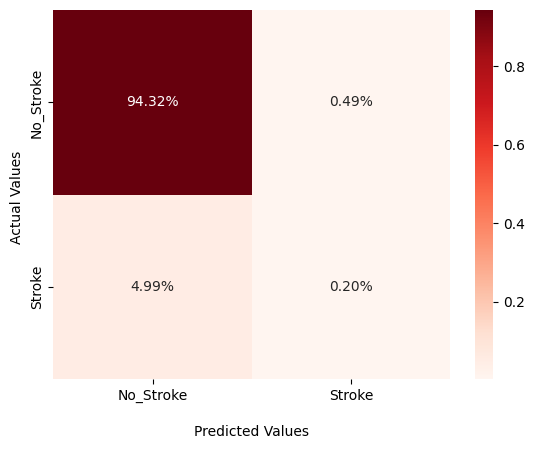

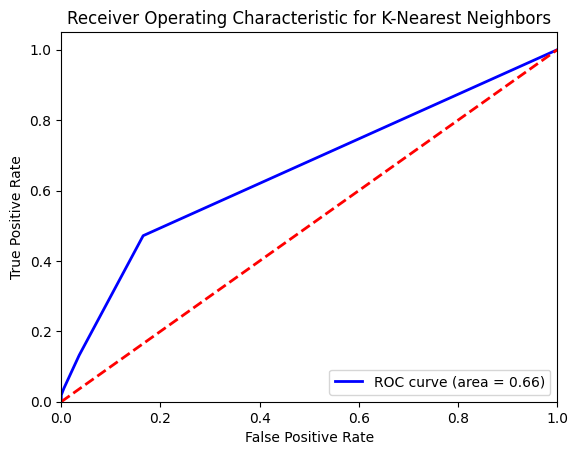

In [41]:
# МЕТОД KNN
# Разбиваем данные на train и test
x = df.drop("stroke", axis=1)
y = df["stroke"]
# Целевая переменная таргет stroke (бинарная)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=105)

# Функция для построения матрицы
def plot_confusion_matrix(Y_test, y_pred, model_name):
    cm = confusion_matrix(Y_test, y_pred)
    ax = sns.heatmap(cm / np.sum(cm), fmt='.2%', annot=True, cmap='Reds')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    ax.yaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    plt.show()

# Выведем значения по каждой метрике качества
def print_metrics(Y_test, y_pred):
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')

# Функция для построения ROC-кривой
def plot_roc_curve(Y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

# Метод KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

print("K-Nearest Neighbors Metrics:")
print_metrics(Y_test, y_pred_knn)
plot_confusion_matrix(Y_test, y_pred_knn, "K-Nearest Neighbors")
plot_roc_curve(Y_test, y_pred_proba_knn, "K-Nearest Neighbors")

In [42]:
# Оформим значения метрик качества и алгоритмы в датафрейм
results = pd.DataFrame({
    'Model': ['Logistic Regression',  'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_score(Y_test, y_pred_lr), accuracy_score(Y_test, y_pred_dt), accuracy_score(Y_test, y_pred_rf), accuracy_score(Y_test, y_pred_knn)],
    'Precision': [precision_score(Y_test, y_pred_lr), precision_score(Y_test, y_pred_dt), precision_score(Y_test, y_pred_rf), precision_score(Y_test, y_pred_knn)],
    'Recall': [recall_score(Y_test, y_pred_lr), recall_score(Y_test, y_pred_dt), recall_score(Y_test, y_pred_rf), recall_score(Y_test, y_pred_knn)],
    'F1 Score': [f1_score(Y_test, y_pred_lr), f1_score(Y_test, y_pred_dt), f1_score(Y_test, y_pred_rf), f1_score(Y_test, y_pred_knn)],
    'ROC AUC': [roc_auc_score(Y_test, y_pred_lr), roc_auc_score(Y_test, y_pred_dt), roc_auc_score(Y_test, y_pred_rf), roc_auc_score(Y_test, y_pred_knn)]
})

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.735812,0.155556,0.924528,0.266304,0.825009
1,Decision Tree,0.917808,0.155556,0.132075,0.142857,0.546430
2,Random Forest,0.947162,0.333333,0.018868,0.035714,0.508402
3,K-Nearest Neighbors,0.945205,0.285714,0.037736,0.066667,0.516288


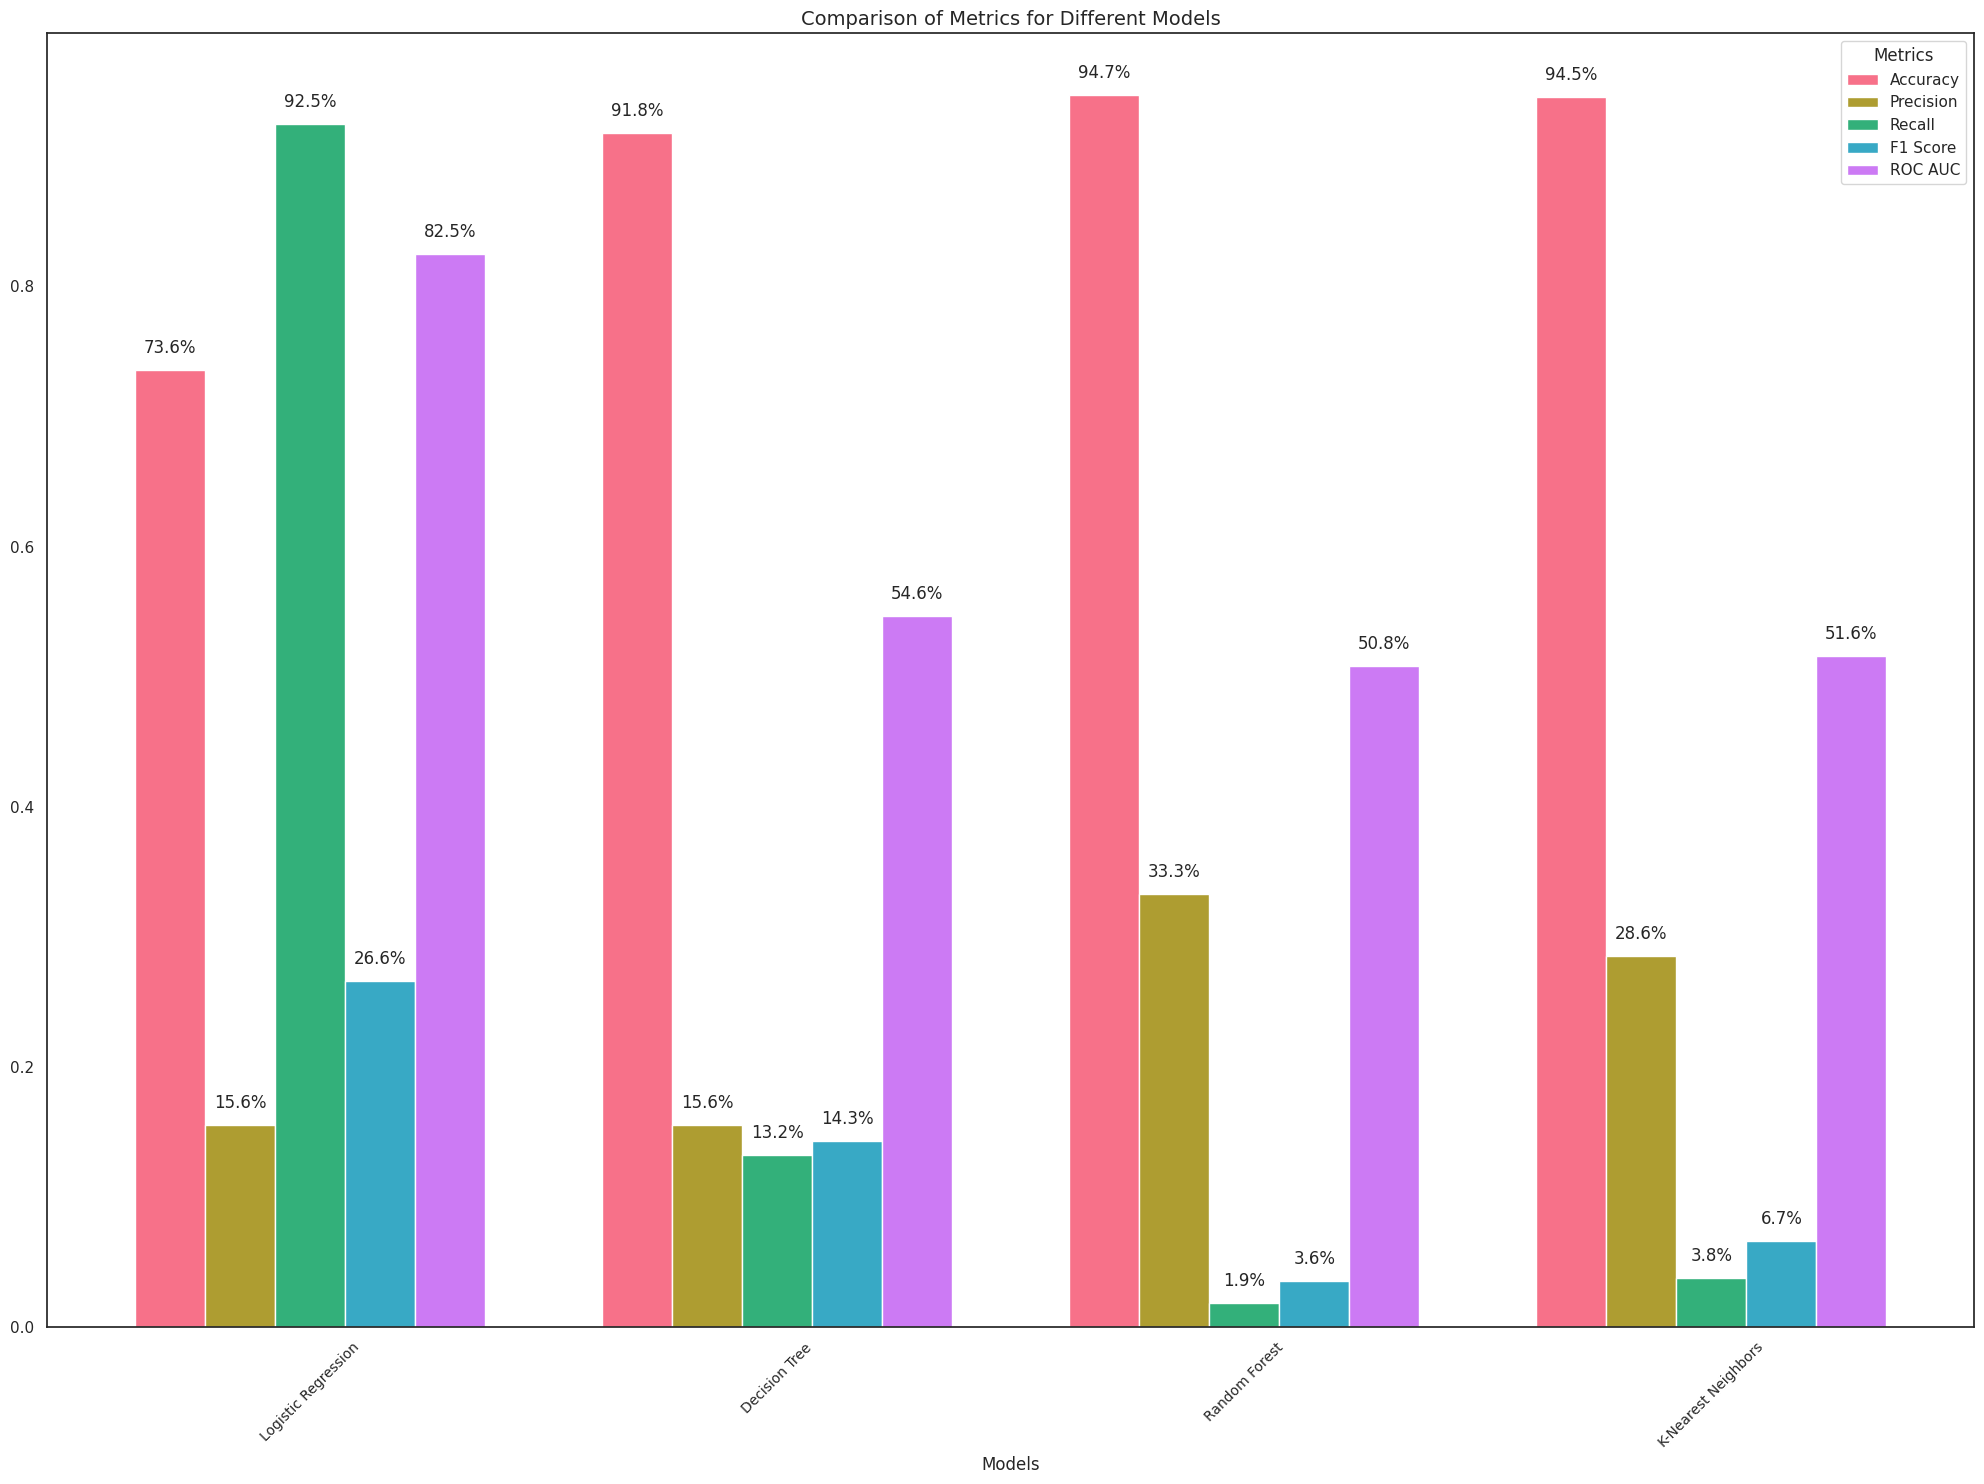

In [43]:
# Для визуального анализа полученных значений метрик качества по моделям построим барчарт с группировкой по моделям
sns.set(style="white")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']

accuracy = [accuracy_score(Y_test, y_pred_lr),
            accuracy_score(Y_test, y_pred_dt), accuracy_score(Y_test, y_pred_rf),
            accuracy_score(Y_test, y_pred_knn)]

precision = [precision_score(Y_test, y_pred_lr),
             precision_score(Y_test, y_pred_dt), precision_score(Y_test, y_pred_rf),
             precision_score(Y_test, y_pred_knn)]

recall = [recall_score(Y_test, y_pred_lr),
          recall_score(Y_test, y_pred_dt), recall_score(Y_test, y_pred_rf),
          recall_score(Y_test, y_pred_knn)]

f1 = [f1_score(Y_test, y_pred_lr),
      f1_score(Y_test, y_pred_dt), f1_score(Y_test, y_pred_rf),
      f1_score(Y_test, y_pred_knn)]

roc_auc = [roc_auc_score(Y_test, y_pred_lr),
           roc_auc_score(Y_test, y_pred_dt), roc_auc_score(Y_test, y_pred_rf),
           roc_auc_score(Y_test, y_pred_knn)]

values = np.array([accuracy, precision, recall, f1, roc_auc])


colors = sns.color_palette("husl", len(metrics))

fig, ax = plt.subplots(figsize=(20,15))


bar_width = 0.15
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    bars = ax.bar(index + i * bar_width, values[i], bar_width, label=metric, color=colors[i])

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval * 100:.1f}%', ha='center', va='bottom')

ax.set_xlabel('Models', fontsize=12)
ax.set_title('Comparison of Metrics for Different Models', fontsize=14)
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(models, fontsize=10)
ax.legend(title='Metrics')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

Accuracy: 0.95
Precision: 0.33
Recall: 0.02
F1 Score: 0.04
ROC AUC: 0.86
MSE: 0.05
R²: 0.08


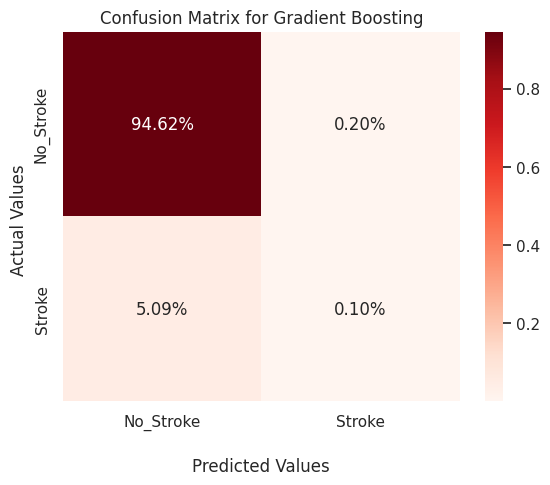

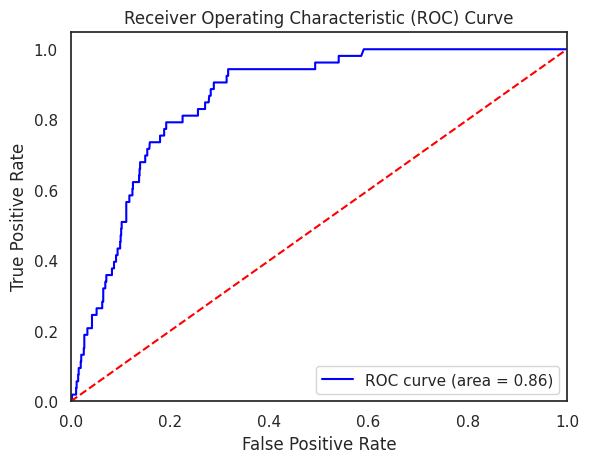

In [44]:
# ГРАДИЕНТНЫЙ БУСТИНГ
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             mean_squared_error, r2_score)

# Разбиваем данные на train и test
x = df.drop("stroke", axis=1)
y = df["stroke"]

# Целевая переменная таргет stroke (бинарная)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=105)

# Создаем и обучаем модель градиентного бустинга
model = GradientBoostingClassifier(random_state=105)
model.fit(X_train, Y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# Функция для построения матрицы
def plot_confusion_matrix(Y_test, y_pred, model_name):
    cm = confusion_matrix(Y_test, y_pred)
    ax = sns.heatmap(cm / np.sum(cm), fmt='.2%', annot=True, cmap='Reds')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    ax.yaxis.set_ticklabels(['No_Stroke', 'Stroke'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Выводим значения по каждой метрике качества
def print_metrics(Y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred_proba)

    # Расчет MSE и R²
    mse = mean_squared_error(Y_test, y_pred_proba)
    r2 = r2_score(Y_test, y_pred_proba)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'R²: {r2:.2f}')

# Выводим метрики
print_metrics(Y_test, y_pred, y_pred_proba)

# Построение матрицы ошибок
plot_confusion_matrix(Y_test, y_pred, "Gradient Boosting")

# Построение кривой ROC AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
# ПУНКТ № 7 СОХРАНЕНИE МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             mean_squared_error, r2_score)
import joblib  # Импортируем библиотеку для сохранения модели

# Предполагаем, что df уже загружен
# Разбиваем данные на train и test
x = df.drop("stroke", axis=1)
y = df["stroke"]

# Целевая переменная таргет stroke (бинарная)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=105)

# Создаем и обучаем модель градиентного бустинга
model = GradientBoostingClassifier(random_state=105)
model.fit(X_train, Y_train)

# Сохраняем модель в файл
joblib.dump(model, 'gradient_boosting_model.pkl')

print("Модель успешно сохранена в файл 'gradient_boosting_model.pkl'")

Модель успешно сохранена в файл 'gradient_boosting_model.pkl'


In [46]:
# ПУНКТ № 7 ПРАКТИЧЕСКОЕ ПРИМЕНЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ
import numpy as np
import pandas as pd
import joblib  # Импортируем библиотеку для загрузки модели

# Загружаем модель из файла
model = joblib.load('gradient_boosting_model.pkl')

# Создаем DataFrame с заданными значениями признаков
# Замените имена признаков на те, которые использовались в обучении
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status']

# Заданные значения признаков
input_data = [[1, 67.0, 0, 1, 0, 3, 1, 228.69, 0]]  # Пример значений

# Создаем DataFrame
input_df = pd.DataFrame(input_data, columns=columns)

# Применяем модель для предсказания
predictions = model.predict(input_df)

# Выводим предсказания
print("Прогноз для заданных значений признаков:", predictions)

Прогноз для заданных значений признаков: [1]


In [47]:
# ВЫВОД: ОБУЧИВ И ПРОАНАЛИЗИРОВАВ РАЗЛИЧНЫЕ МОДЕЛИ, МЫ МОЖЕМ ОЦЕНИТЬ ИХ КАЧЕСТВО ПО МЕТРИКАМ КАЧЕСТВА. НАИЛУЧШАЯ МОДЕЛЬ ОПРЕДЕЛЯЕТСЯ ПО НАИБОЛЬШИМ ЗНАЧЕНИЯМ УПОМЯНУТЫХ МЕТРИК.
# ВИЗУАЛИЗАЦИЯ ROC-КРИВОЙ СПОСОБСТВУЕТ ОЦЕНКЕ СПОСОБНОСТИ МОДЕЛИ РАЗЛИЧАТЬ КЛАССЫ, А ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИИ ПОМОГАЕТ ВЫЯВИТЬ ЗАВИСИМОСТИ МЕЖДУ ПРИЗНАКАМИ.
# РАБОТЫ ПО УЛУЧШЕНИЮ МОДЕЛЕЙ МОГУТ ВКЛЮЧАТЬ ПОИСК ЗНАЧЕНИЙ ГИПЕРПАРАМЕТРОВ, ПРИМЕНЕНИЕ КРОСС-ВАЛИДАЦИИ И АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ДЛЯ ПОВЫШЕНИЯ ПРЕДСКАЗАТЕЛЬНОЙ СПОСОБНОСТИ ВЫБРАННОЙ МОДЕЛИ.
# В ДАННОМ СЛУЧАЕ НАИВЫСШИЕ ПОКАЗАТЕЛИ ИМЕЮТСЯ У МЕТОДА ГРАДИЕНТНОГО БУСТИНГА, ОДНАКО В ГРУППЕ БЕЗ ГРАДИЕНТНОГО БУСТИНГА ПРЕЙМУЩЕСТВОМ ОБЛАДАЕТ ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ КАК ПО ВЫСОКИМ ЗНАЧЕНИЯМ МЕТРИК КАЧЕСТВА ТАК И ПО ЗНАЧЕНИЯМ ROC AUC.